<a href="https://colab.research.google.com/github/asrianda/disertasi/blob/main/Jurnal_Ukrania_ID3_Modifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perhitungan Hasil Entropi Shannon dan Entropi Modifikasi**

In [ ]:
import numpy as np

def modified_entropy(p, n):
    """
    Menghitung entropi modifikasi berdasarkan rumus yang diberikan.

    Parameters:
    p (int): Jumlah data positif.
    n (int): Jumlah data negatif.

    Returns:
    float: Nilai entropi modifikasi.
    """
    if p == 0 and n == 0:
        return 0  # Jika tidak ada data
    elif p == 0 or n == 0:
        return 0  # Jika salah satu kelas kosong (entropi = 0)

    total = p + n
    ln2 = np.log(2)
    term1 = np.log(total)
    term2 = (p * np.log(p) + n * np.log(n)) / total

    return (1 / ln2) * (term1 - term2)

# Contoh penggunaan
p = 10  # Jumlah data positif
n = 50   # Jumlah data negatif

entropy = modified_entropy(p, n)
print(f"Entropi Modifikasi: {entropy:.4f}")


Entropi Modifikasi: 0.6500


In [ ]:
import numpy as np

def shannon_entropy(p, n):
    """
    Menghitung entropi Shannon berdasarkan rumus Shannon entropy.

    Parameters:
    p (int): Jumlah data positif.
    n (int): Jumlah data negatif.

    Returns:
    float: Nilai entropi Shannon.
    """
    total = p + n
    p_prob = p / total
    n_prob = n / total

    # Menghindari log(0) yang tidak terdefinisi
    if p_prob == 0 or n_prob == 0:
        return 0

    # Menghitung entropi Shannon
    entropy = - (p_prob * np.log2(p_prob) + n_prob * np.log2(n_prob))
    return entropy

# Contoh penggunaan
p = 10  # Jumlah data positif
n = 50   # Jumlah data negatif

entropy = shannon_entropy(p, n)
print(f"Entropi Shannon: {entropy:.4f}")


Entropi Shannon: 0.6500


In [ ]:
import pandas as pd

# Memuat dataset
file_path = 'marketing_campaign_clean.csv'
df = pd.read_csv(file_path)

# Menampilkan informasi awal tentang dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2240 non-null   object
 1   Marital_Status             2240 non-null   object
 2   Kidhome                    2240 non-null   int64 
 3   Teenhome                   2240 non-null   int64 
 4   AcceptedCmp3               2240 non-null   int64 
 5   AcceptedCmp4               2240 non-null   int64 
 6   AcceptedCmp5               2240 non-null   int64 
 7   AcceptedCmp1               2240 non-null   int64 
 8   AcceptedCmp2               2240 non-null   int64 
 9   Complain                   2240 non-null   int64 
 10  Response                   2240 non-null   int64 
 11  Income_range               2240 non-null   object
 12  Recency_range              2240 non-null   object
 13  MntWines_range             2240 non-null   object
 14  MntFruit

(None,
     Education Marital_Status  Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  \
 0  Graduation         Single        0         0             0             0   
 1  Graduation         Single        1         1             0             0   
 2  Graduation       Together        0         0             0             0   
 3  Graduation       Together        1         0             0             0   
 4         PhD        Married        1         0             0             0   
 
    AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  ...  MntFruits_range  \
 0             0             0             0         0  ...          70-<100   
 1             0             0             0         0  ...            0-<10   
 2             0             0             0         0  ...           10-<50   
 3             0             0             0         0  ...            0-<10   
 4             0             0             0         0  ...           10-<50   
 
   MntFishProducts_range MntS

**Membangun Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Memilih kolom fitur dan target
target_column = 'Response'
feature_columns = [col for col in df.columns if col != target_column]

# Encode data kategorikal ke numerik
encoded_df = df.copy()
label_encoders = {}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Memisahkan fitur dan target
X = encoded_df[feature_columns].values
y = encoded_df[target_column].values

# Menampilkan beberapa data hasil praproses
X[:5], y[:5]


(array([[2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 6, 5, 3, 4, 7, 4, 0, 3, 1, 0,
         2],
        [2, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         2],
        [2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 1, 2, 1, 1, 1, 0, 3, 0, 2,
         0],
        [2, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         2],
        [4, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 6, 2, 1, 1, 1, 1, 1, 1, 3, 0, 1,
         2]]),
 array([1, 0, 0, 0, 0]))

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Definisikan kelas DecisionTreeModEntropy
class DecisionTreeModEntropy:
    def __init__(self):
        self.tree = None

    def modified_entropy(self, p, n):
        if p == 0 and n == 0:
            return 0
        elif p == 0 or n == 0:
            return 0

        total = p + n
        ln2 = np.log(2)
        term1 = np.log(total)
        term2 = (p * np.log(p) + n * np.log(n)) / total

        return (1 / ln2) * (term1 - term2)

    def calculate_gain(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)

        initial_entropy = self.modified_entropy(p, n)

        values, counts = np.unique(data[:, feature], return_counts=True)
        weighted_entropy = 0

        for value, count in zip(values, counts):
            subset_target = target[data[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.modified_entropy(p_subset, n_subset)

        return initial_entropy - weighted_entropy

    def fit(self, data, target):
        self.tree = self._build_tree(data, target)

    def _build_tree(self, data, target):
        if np.all(target == target[0]):
            return {'label': target[0]}

        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data[:, best_feature])

        for value in values:
            subset_data = data[data[:, best_feature] == value]
            subset_target = target[data[:, best_feature] == value]
            subtree = self._build_tree(subset_data, subset_target)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

    def print_tree(self, tree=None, depth=0):
        if tree is None:
            tree = self.tree
        if 'label' in tree:
            print("  " * depth + f"Label: {tree['label']}")
        else:
            print("  " * depth + f"Feature {tree['feature']}:")
            for value, subtree in tree['children'].items():
                print("  " * (depth + 1) + f"Value {value}:")
                self.print_tree(subtree, depth + 2)

# Membuat dataset dummy untuk percakapan ini
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model
model = DecisionTreeModEntropy()
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan pohon keputusan dan laporan klasifikasi
print("Pohon Keputusan:")
model.print_tree()

print("\nLaporan Klasifikasi:")
print(classification_rep)


Pohon Keputusan:
Feature 0:
  Value -4.233588927793632:
    Label: 0
  Value -3.5155970666025746:
    Label: 0
  Value -2.8264353041192947:
    Label: 0
  Value -2.6512154327184083:
    Label: 0
  Value -2.6287537909411283:
    Label: 0
  Value -2.62688364710509:
    Label: 0
  Value -2.5316727806511645:
    Label: 0
  Value -2.4707684890833335:
    Label: 0
  Value -2.4452006404038165:
    Label: 0
  Value -2.220692819918364:
    Label: 0
  Value -2.1818072431825817:
    Label: 0
  Value -2.111619286372836:
    Label: 0
  Value -1.7525174618562023:
    Label: 0
  Value -1.7370780342087762:
    Label: 0
  Value -1.6073032192767012:
    Label: 0
  Value -1.5628799512584868:
    Label: 0
  Value -1.515037743862977:
    Label: 0
  Value -1.4567616131089591:
    Label: 0
  Value -1.2581729625927252:
    Label: 0
  Value -1.1612869506710521:
    Label: 0
  Value -1.0141284800592856:
    Label: 0
  Value -0.9134351916315657:
    Label: 0
  Value -0.7719971435275791:
    Label: 0
  Value -0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Definisikan kelas DecisionTreeModEntropy
class DecisionTreeModEntropy:
    def __init__(self):
        self.tree = None

    def modified_entropy(self, p, n):
        if p == 0 and n == 0:
            return 0
        elif p == 0 or n == 0:
            return 0

        total = p + n
        ln2 = np.log(2)
        term1 = np.log(total)
        term2 = (p * np.log(p) + n * np.log(n)) / total

        return (1 / ln2) * (term1 - term2)

    def calculate_gain(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)

        initial_entropy = self.modified_entropy(p, n)

        values, counts = np.unique(data[:, feature], return_counts=True)
        weighted_entropy = 0

        for value, count in zip(values, counts):
            subset_target = target[data[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.modified_entropy(p_subset, n_subset)

        return initial_entropy - weighted_entropy

    def fit(self, data, target):
        self.tree = self._build_tree(data, target)

    def _build_tree(self, data, target):
        if np.all(target == target[0]):
            return {'label': target[0]}

        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data[:, best_feature])

        for value in values:
            subset_data = data[data[:, best_feature] == value]
            subset_target = target[data[:, best_feature] == value]
            subtree = self._build_tree(subset_data, subset_target)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

    def print_tree(self, tree=None, depth=0):
        if tree is None:
            tree = self.tree
        if 'label' in tree:
            print("  " * depth + f"Label: {tree['label']}")
        else:
            print("  " * depth + f"Feature {tree['feature']}:")
            for value, subtree in tree['children'].items():
                print("  " * (depth + 1) + f"Value {value}:")
                self.print_tree(subtree, depth + 2)

# Membuat dataset dummy untuk percakapan ini
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model
model = DecisionTreeModEntropy()
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan pohon keputusan
print("Pohon Keputusan:")
model.print_tree()

# Menampilkan laporan klasifikasi dan akurasi
print("\nLaporan Klasifikasi:")
print(classification_rep)

print(f"\nAkurasi: {accuracy:.4f}")



Pohon Keputusan:
Feature 0:
  Value -4.233588927793632:
    Label: 0
  Value -3.5155970666025746:
    Label: 0
  Value -2.8264353041192947:
    Label: 0
  Value -2.6512154327184083:
    Label: 0
  Value -2.6287537909411283:
    Label: 0
  Value -2.62688364710509:
    Label: 0
  Value -2.5316727806511645:
    Label: 0
  Value -2.4707684890833335:
    Label: 0
  Value -2.4452006404038165:
    Label: 0
  Value -2.220692819918364:
    Label: 0
  Value -2.1818072431825817:
    Label: 0
  Value -2.111619286372836:
    Label: 0
  Value -1.7525174618562023:
    Label: 0
  Value -1.7370780342087762:
    Label: 0
  Value -1.6073032192767012:
    Label: 0
  Value -1.5628799512584868:
    Label: 0
  Value -1.515037743862977:
    Label: 0
  Value -1.4567616131089591:
    Label: 0
  Value -1.2581729625927252:
    Label: 0
  Value -1.1612869506710521:
    Label: 0
  Value -1.0141284800592856:
    Label: 0
  Value -0.9134351916315657:
    Label: 0
  Value -0.7719971435275791:
    Label: 0
  Value -0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ID3 Modifikasi**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from graphviz import Digraph

# Memuat dataset marketing_campaign_clean.csv
data = pd.read_csv('marketing_campaign_clean.csv')

# Menampilkan beberapa data awal untuk memahami struktur dataset
#print(data.head())

# Menentukan target (misalnya kolom 'Response' sebagai target)
target_column = 'Response'  # Ganti dengan nama kolom yang sesuai
features = data.drop(columns=[target_column])

# Mengonversi kategori menjadi angka jika ada kolom kategori
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(data[target_column])

# Menstandarisasi fitur (normalisasi)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mendefinisikan kelas DecisionTreeModEntropy
class DecisionTreeModEntropy:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth  # Menambahkan batas kedalaman pohon

    def modified_entropy(self, p, n):
        if p == 0 and n == 0:
            return 0
        elif p == 0 or n == 0:
            return 0

        total = p + n
        ln2 = np.log(2)
        term1 = np.log(total)
        term2 = (p * np.log(p) + n * np.log(n)) / total

        return (1 / ln2) * (term1 - term2)

    def calculate_gain(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)

        initial_entropy = self.modified_entropy(p, n)

        # Menggunakan .iloc untuk memilih kolom berdasarkan index
        values, counts = np.unique(data.iloc[:, feature], return_counts=True)
        weighted_entropy = 0

        for value, count in zip(values, counts):
            subset_target = target[data.iloc[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.modified_entropy(p_subset, n_subset)

        return initial_entropy - weighted_entropy

    def fit(self, data, target):
        self.tree = self._build_tree(data, target, depth=0)

    def _build_tree(self, data, target, depth):
        # Cek jika sudah mencapai kedalaman maksimal
        if self.max_depth is not None and depth >= self.max_depth:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        # Kondisi jika target hanya memiliki satu nilai
        if target.nunique() == 1:
            return {'label': target.iloc[0]}

        # Jika tidak ada fitur yang tersisa untuk dipisah
        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        # Jika semua gainnya 0, berarti tidak ada fitur yang bisa membagi
        if gains[best_feature] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data.iloc[:, best_feature])  # Menggunakan iloc di sini

        for value in values:
            subset_data = data[data.iloc[:, best_feature] == value].copy()
            subset_target = target[data.iloc[:, best_feature] == value].copy()
            subtree = self._build_tree(subset_data, subset_target, depth + 1)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

    def plot_tree(self, tree=None, dot=None, parent_name=None):
        if dot is None:
            dot = Digraph()

        if tree is None:
            tree = self.tree

        if 'label' in tree:
            dot.node(str(id(tree)), f'Label: {tree["label"]}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))
        else:
            feature = tree['feature']
            dot.node(str(id(tree)), f'Feature {feature}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))

            for value, subtree in tree['children'].items():
                self.plot_tree(subtree, dot, str(id(tree)))

        return dot

# Melatih model
model = DecisionTreeModEntropy(max_depth=20)  # Menambahkan batas kedalaman
model.fit(pd.DataFrame(X_train), pd.Series(y_train))

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan struktur pohon keputusan sebagai grafik
dot = model.plot_tree()

# Menyimpan grafik pohon ke file
dot.render('decision_tree', format='png', cleanup=True)

# Menampilkan pohon keputusan dalam bentuk grafik (harus membuka file decision_tree.png)
dot.view()

# Menampilkan laporan klasifikasi dan akurasi
print("Laporan Klasifikasi:")
print(classification_rep)

print(f"\nAkurasi: {accuracy:.4f}")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.982313 to fit


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       577
           1       0.30      0.31      0.30        95

    accuracy                           0.80       672
   macro avg       0.59      0.59      0.59       672
weighted avg       0.80      0.80      0.80       672


Akurasi: 0.8021


**Hitung Entropi Shannon**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from graphviz import Digraph

# Memuat dataset marketing_campaign_clean.csv
data = pd.read_csv('marketing_campaign_clean.csv')

# Menampilkan beberapa data awal untuk memahami struktur dataset
#print(data.head())

# Menentukan target (misalnya kolom 'Response' sebagai target)
target_column = 'Response'  # Ganti dengan nama kolom yang sesuai
features = data.drop(columns=[target_column])

# Mengonversi kategori menjadi angka jika ada kolom kategori
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(data[target_column])

# Menstandarisasi fitur (normalisasi)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mendefinisikan kelas ID3 dengan Shannon Entropy
class DecisionTreeID3:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth  # Menambahkan batas kedalaman pohon

    def shannon_entropy(self, p, n):
        total = p + n
        if total == 0:
            return 0
        prob_p = p / total
        prob_n = n / total
        return -prob_p * np.log2(prob_p) - prob_n * np.log2(prob_n) if prob_p > 0 and prob_n > 0 else 0

    def calculate_gain(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)

        initial_entropy = self.shannon_entropy(p, n)

        # Menggunakan .iloc untuk memilih kolom berdasarkan index
        values, counts = np.unique(data.iloc[:, feature], return_counts=True)
        weighted_entropy = 0

        for value, count in zip(values, counts):
            subset_target = target[data.iloc[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.shannon_entropy(p_subset, n_subset)

        return initial_entropy - weighted_entropy

    def fit(self, data, target):
        self.tree = self._build_tree(data, target, depth=0)

    def _build_tree(self, data, target, depth):
        # Cek jika sudah mencapai kedalaman maksimal
        if self.max_depth is not None and depth >= self.max_depth:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        # Kondisi jika target hanya memiliki satu nilai
        if target.nunique() == 1:
            return {'label': target.iloc[0]}

        # Jika tidak ada fitur yang tersisa untuk dipisah
        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        # Jika semua gainnya 0, berarti tidak ada fitur yang bisa membagi
        if gains[best_feature] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data.iloc[:, best_feature])  # Menggunakan iloc di sini

        for value in values:
            subset_data = data[data.iloc[:, best_feature] == value].copy()
            subset_target = target[data.iloc[:, best_feature] == value].copy()
            subtree = self._build_tree(subset_data, subset_target, depth + 1)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

    def plot_tree(self, tree=None, dot=None, parent_name=None):
        if dot is None:
            dot = Digraph()

        if tree is None:
            tree = self.tree

        if 'label' in tree:
            dot.node(str(id(tree)), f'Label: {tree["label"]}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))
        else:
            feature = tree['feature']
            dot.node(str(id(tree)), f'Feature {feature}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))

            for value, subtree in tree['children'].items():
                self.plot_tree(subtree, dot, str(id(tree)))

        return dot

# Melatih model
model = DecisionTreeID3(max_depth=10)  # Menambahkan batas kedalaman
model.fit(pd.DataFrame(X_train), pd.Series(y_train))

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan struktur pohon keputusan sebagai grafik
dot = model.plot_tree()

# Menyimpan grafik pohon ke file
dot.render('decision_tree_id3', format='png', cleanup=True)

# Menampilkan pohon keputusan dalam bentuk grafik (harus membuka file decision_tree_id3.png)
dot.view()

# Menampilkan laporan klasifikasi dan akurasi
print("Laporan Klasifikasi:")
print(classification_rep)

print(f"\nAkurasi: {accuracy:.4f}")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.981371 to fit


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       577
           1       0.31      0.31      0.31        95

    accuracy                           0.81       672
   macro avg       0.60      0.60      0.60       672
weighted avg       0.80      0.81      0.81       672


Akurasi: 0.8065


**Pustaka Sklearn**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# Memuat dataset marketing_campaign_clean.csv
data = pd.read_csv('marketing_campaign_clean.csv')

# Menampilkan beberapa data awal untuk memahami struktur dataset
print(data.head())

# Menentukan target (misalnya kolom 'Response' sebagai target)
target_column = 'Response'  # Ganti dengan nama kolom yang sesuai
features = data.drop(columns=[target_column])

# Mengonversi kategori menjadi angka jika ada kolom kategori
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(data[target_column])

# Menstandarisasi fitur (normalisasi)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model pohon keputusan dengan criterion='entropy' (Shannon Entropy)
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=20)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan struktur pohon keputusan sebagai grafik
dot_data = export_graphviz(model, out_file=None,
                           feature_names=features.columns.astype(str),  # Pastikan nama fitur dalam format string
                           class_names=label_encoder.classes_.astype(str),  # Pastikan nama kelas dalam format string
                           filled=True, rounded=True,
                           special_characters=True)

# Membuat dan menampilkan grafik pohon
graph = Source(dot_data)

# Menyimpan grafik pohon ke file
graph.render('decision_tree_id3_sklearn', format='png', cleanup=True)

# Menampilkan pohon keputusan dalam bentuk grafik (harus membuka file decision_tree_id3_sklearn.png)
graph.view()

# Menampilkan laporan klasifikasi dan akurasi
print("Laporan Klasifikasi:")
print(classification_rep)

print(f"\nAkurasi: {accuracy:.4f}")


    Education Marital_Status  Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  \
0  Graduation         Single        0         0             0             0   
1  Graduation         Single        1         1             0             0   
2  Graduation       Together        0         0             0             0   
3  Graduation       Together        1         0             0             0   
4         PhD        Married        1         0             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  ...  MntFruits_range  \
0             0             0             0         0  ...          70-<100   
1             0             0             0         0  ...            0-<10   
2             0             0             0         0  ...           10-<50   
3             0             0             0         0  ...            0-<10   
4             0             0             0         0  ...           10-<50   

  MntFishProducts_range MntSweetProducts_range Mnt

**Hitung Lagi**

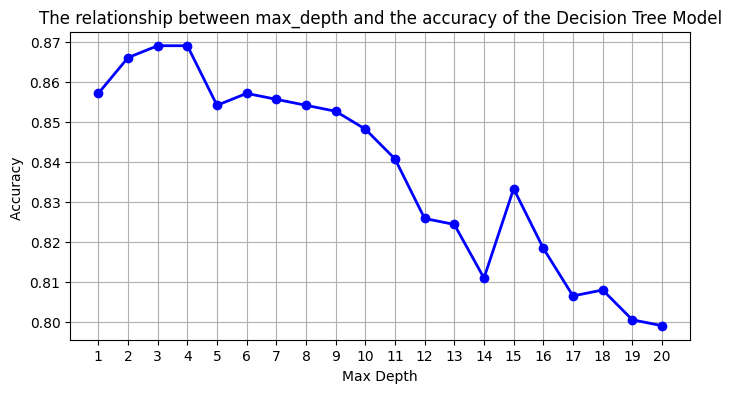

max_depth = 1, Akurasi = 0.8571
max_depth = 2, Akurasi = 0.8661
max_depth = 3, Akurasi = 0.8690
max_depth = 4, Akurasi = 0.8690
max_depth = 5, Akurasi = 0.8542
max_depth = 6, Akurasi = 0.8571
max_depth = 7, Akurasi = 0.8557
max_depth = 8, Akurasi = 0.8542
max_depth = 9, Akurasi = 0.8527
max_depth = 10, Akurasi = 0.8482
max_depth = 11, Akurasi = 0.8408
max_depth = 12, Akurasi = 0.8259
max_depth = 13, Akurasi = 0.8244
max_depth = 14, Akurasi = 0.8110
max_depth = 15, Akurasi = 0.8333
max_depth = 16, Akurasi = 0.8185
max_depth = 17, Akurasi = 0.8065
max_depth = 18, Akurasi = 0.8080
max_depth = 19, Akurasi = 0.8006
max_depth = 20, Akurasi = 0.7991


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Memuat dataset marketing_campaign_clean.csv
data = pd.read_csv('marketing_campaign_clean.csv')

# Menampilkan beberapa data awal untuk memahami struktur dataset
#print(data.head())

# Menentukan target (misalnya kolom 'Response' sebagai target)
target_column = 'Response'  # Ganti dengan nama kolom yang sesuai
features = data.drop(columns=[target_column])

# Mengonversi kategori menjadi angka jika ada kolom kategori
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(data[target_column])

# Menstandarisasi fitur (normalisasi)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menyimpan nilai max_depth dan akurasi
max_depth_values = range(1, 21)
accuracies = []

# Mencoba berbagai nilai max_depth dan menghitung akurasi
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)  # Menambahkan criterion='entropy'
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Membuat grafik untuk melihat hubungan antara max_depth dan akurasi
plt.figure(figsize=(8, 4))
plt.plot(max_depth_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('The relationship between max_depth and the accuracy of the Decision Tree Model')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.xticks(max_depth_values)
plt.show()

# Menampilkan hasil akurasi untuk setiap nilai max_depth
for depth, accuracy in zip(max_depth_values, accuracies):
    print(f"max_depth = {depth}, Akurasi = {accuracy:.4f}")


**Kedalamanan MAxDep ID3 Modifikasi**

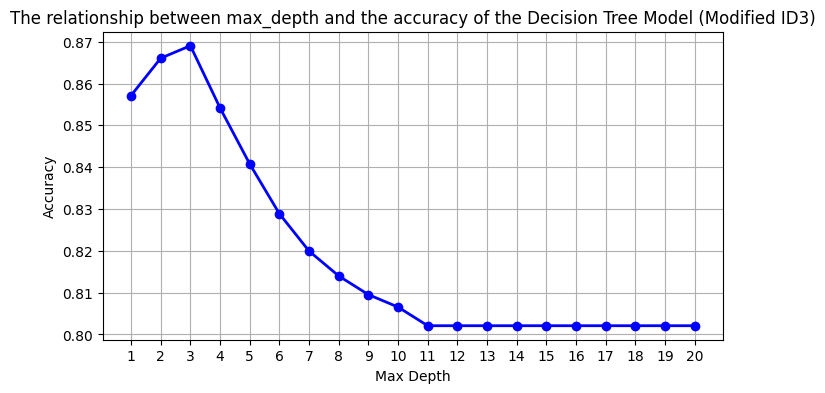

max_depth = 1, Accuracy = 0.8571
max_depth = 2, Accuracy = 0.8661
max_depth = 3, Accuracy = 0.8690
max_depth = 4, Accuracy = 0.8542
max_depth = 5, Accuracy = 0.8408
max_depth = 6, Accuracy = 0.8289
max_depth = 7, Accuracy = 0.8199
max_depth = 8, Accuracy = 0.8140
max_depth = 9, Accuracy = 0.8095
max_depth = 10, Accuracy = 0.8065
max_depth = 11, Accuracy = 0.8021
max_depth = 12, Accuracy = 0.8021
max_depth = 13, Accuracy = 0.8021
max_depth = 14, Accuracy = 0.8021
max_depth = 15, Accuracy = 0.8021
max_depth = 16, Accuracy = 0.8021
max_depth = 17, Accuracy = 0.8021
max_depth = 18, Accuracy = 0.8021
max_depth = 19, Accuracy = 0.8021
max_depth = 20, Accuracy = 0.8021


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Memuat dataset marketing_campaign_clean.csv
data = pd.read_csv('marketing_campaign_clean.csv')

# Menampilkan beberapa data awal untuk memahami struktur dataset
#print(data.head())

# Menentukan target (misalnya kolom 'Response' sebagai target)
target_column = 'Response'  # Ganti dengan nama kolom yang sesuai
features = data.drop(columns=[target_column])

# Mengonversi kategori menjadi angka jika ada kolom kategori
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(data[target_column])

# Menstandarisasi fitur (normalisasi)
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class DecisionTreeModEntropy:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def modified_entropy(self, p, n):
        if p == 0 and n == 0:
            return 0
        elif p == 0 or n == 0:
            return 0
        total = p + n
        ln2 = np.log(2)
        term1 = np.log(total)
        term2 = (p * np.log(p) + n * np.log(n)) / total
        return (1 / ln2) * (term1 - term2)

    def calculate_gain(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)
        initial_entropy = self.modified_entropy(p, n)

        # Menggunakan .iloc untuk memilih kolom berdasarkan index
        values, counts = np.unique(data.iloc[:, feature], return_counts=True)
        weighted_entropy = 0

        for value, count in zip(values, counts):
            subset_target = target[data.iloc[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.modified_entropy(p_subset, n_subset)

        return initial_entropy - weighted_entropy

    def fit(self, data, target):
        self.tree = self._build_tree(data, target)

    def _build_tree(self, data, target, depth=0):
        # Jika target hanya memiliki satu nilai, kita berhenti dan memberikan label
        if np.all(target.iloc[:] == target.iloc[0]):
            return {'label': target.iloc[0]}

        # Jika sudah mencapai max_depth, kita berhenti dan memberikan label berdasarkan rata-rata atau modus
        if self.max_depth and depth >= self.max_depth:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        # Menghitung gain untuk setiap fitur
        gains = [self.calculate_gain(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data.iloc[:, best_feature])

        # Membagi data dan membangun sub-pohon untuk setiap nilai fitur
        for value in values:
            subset_data = data[data.iloc[:, best_feature] == value]
            subset_target = target[data.iloc[:, best_feature] == value]
            subtree = self._build_tree(subset_data, subset_target, depth + 1)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

# Menyimpan nilai max_depth dan akurasi
max_depth_values = range(1, 21)
accuracies = []

# Mencoba berbagai nilai max_depth dan menghitung akurasi
for max_depth in max_depth_values:
    model = DecisionTreeModEntropy(max_depth=max_depth)
    model.fit(pd.DataFrame(X_train), pd.Series(y_train))  # Memastikan input ke model berupa DataFrame dan Series
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Membuat grafik untuk melihat hubungan antara max_depth dan akurasi
plt.figure(figsize=(8, 4))
plt.plot(max_depth_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('The relationship between max_depth and the accuracy of the Decision Tree Model (Modified ID3)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(max_depth_values)
plt.show()

# Menampilkan hasil akurasi untuk setiap nilai max_depth
for depth, accuracy in zip(max_depth_values, accuracies):
    print(f"max_depth = {depth}, Accuracy = {accuracy:.4f}")
